## Manifold Methods for Non-Linear Visualizations


*Manifold methods allow us to visualize the correlations between features of the dataset and the provided lables (output)*

#### It is observed from Spectral Embeddings and MDE (Multi Dimensional Scaling), that the dataset is Non-linearly seperable, and allows us to expect a high-classification performance !

In [25]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

Axes3D
# FILENAME here

filename="../preprocessed/amlodipine.csv"

f = open(filename)
f.readline()
data =  np.loadtxt(fname = f, delimiter = ',',dtype='double')

label = data[:,0]
print 'label: ',label
X = data[:, 1:data.shape[1]]
print 'X: ',X
# Dataset has Label at index 0

# Reading the labels now
f= open(filename)
labels_=np.loadtxt(fname=f,delimiter=',',dtype='string')
labels_=labels_[0,1:]

Automatically created module for IPython interactive environment
label:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.]
X:  [[   1.      57.     158.    ...,   70.       0.416    3.571]
 [   1.      65.     154

In [26]:
print 'X: ',X
print 'labels: ',label

X:  [[   1.      57.     158.    ...,   70.       0.416    3.571]
 [   1.      65.     154.    ...,   66.       0.376    5.414]
 [   1.      54.     150.    ...,   70.       0.432    0.793]
 ..., 
 [   1.      65.     154.    ...,   54.      11.53     0.899]
 [   1.      54.     150.    ...,   50.       3.174    8.421]
 [   0.      70.     153.    ...,   53.       9.53     7.426]]
labels:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3

#### Normalizing to Zero Mean Unit Variance

In [27]:
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

In [28]:
prev=0;
for i in range(X.shape[1]):
    for j in range(X.shape[0]):
        if (np.isnan(X[j,i])):
            X[j,i]=0

### Validate No. of neighbors & Components

#### Restriction: n_neighbors > [n_components * (n_components + 3) / 2]

** The no. of neighbors is to be validated **

In [29]:
n_neighbors = 30
n_components = 6

## Locally Linear Embeddings and Variations

standard: 0.036 sec
ltsa: 0.12 sec
hessian: 0.17 sec
modified: 0.12 sec


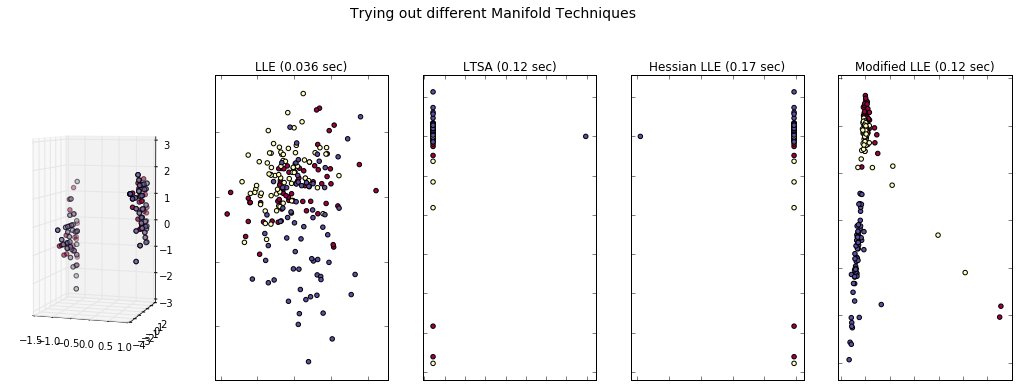

In [30]:

fig = plt.figure(figsize=(18, 12))
plt.suptitle("Trying out different Manifold Techniques", fontsize=14)

## Some compatibility code below per Sklearn requirements 
try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(251, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=label, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(251, projection='3d')
    plt.scatter(X[:, 0], X[:, 2], c=label, cmap=plt.cm.Spectral)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='dense',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')


## Isomap Learning

Isomap: 0.064 sec


(-8.5153403247666386,
 11.308210807551674,
 -7.3943781976433689,
 9.4322986127716888)

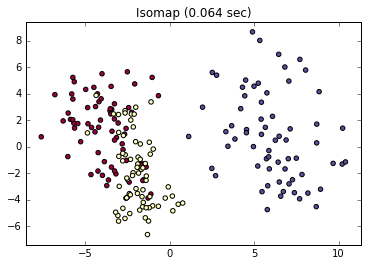

In [31]:
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## Multi-dimensional Scaling (MDS)

MDS: 0.14 sec


(-7.249471363009703,
 7.2232770120646377,
 -6.5455527953109574,
 7.3543590475803438)

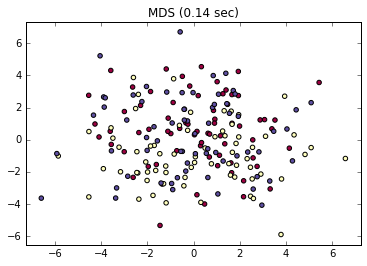

In [32]:

t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

## Spectral Embeddings

SpectralEmbedding: 0.032 sec


(-0.52763236571534811,
 1.0435868673439541,
 -0.9533787941498314,
 1.1677934839518866)

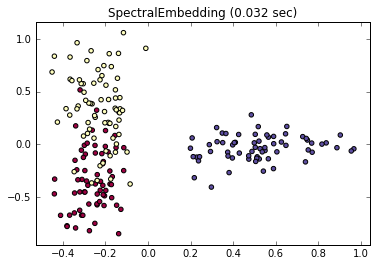

In [33]:

t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


## t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE: 2.1 sec


(-10448.810636464546,
 10450.433542427405,
 -16739.671328171353,
 15329.292915115491)

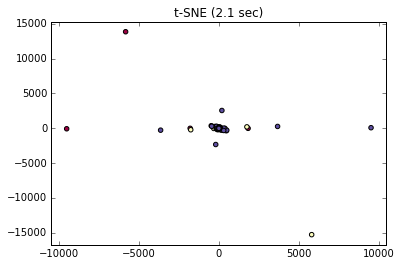

In [34]:
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=label, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()